In [3]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate


# *Blunt Scenario*

### **Identify and Explain Issue**


In [23]:
def identify_explain_blunt(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. Take a neurodiversity-informed stance. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [24]:
with open('../blunt_generated_data/blunt.json') as f:
    blunt_statements_generated = json.load(f)
    
blunt_statements_generated[0:2]


[{'Speaker 1': 'How about we try that new sushi place?',
  'Speaker 2': "I really don't like sushi. It tastes bad and is overpriced."},
 {'Speaker 1': "I'm considering getting a pet snake.",
  'Speaker 2': "That's a terrible idea. Snakes aren't good pets for beginners."}]

In [25]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated[i].items()])
    response = identify_explain_blunt(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [26]:
with open('../blunt_analysis_data/identify_explain_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [27]:
with open('../blunt_analysis_data/identify_explain_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'Speaker 2',
  'explanation': "Speaker 2 could improve their communication by expressing their dislike for sushi in a more respectful and less absolute manner. While it's important to be honest about preferences, stating 'it tastes bad' may come off as dismissive of others' tastes. A more effective approach would be to say something like, 'I'm not a fan of sushi. How about we try another type of cuisine?' This respects Speaker 1's suggestion while also clearly communicating their own preference."},
 {'fault': 'Speaker 2',
  'explanation': "Speaker 2 needs to improve their communication. While it's okay to have an opinion, the way they expressed it may come across as harsh and dismissive to Speaker 1. A more constructive approach would be to express their concerns with reasons, such as why snakes might not be suitable for beginners, and possibly suggest alternatives. This way, the conversation respects Speaker 1's interest while providing helpful information."}]

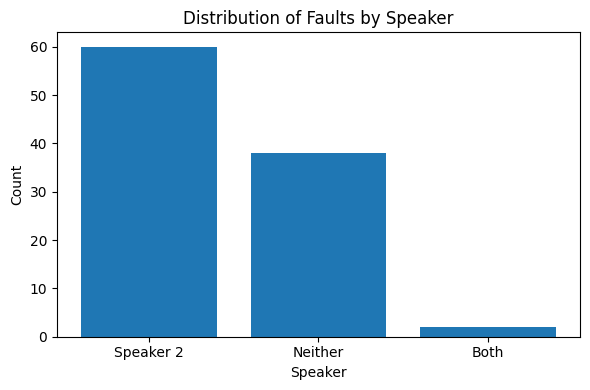

In [28]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [31]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? Take a neurodiversity-informed stance. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [32]:
with open('../blunt_generated_data/blunt.json') as f:
    blunt_statements_generated = json.load(f)
    
blunt_statements_generated[0:2]


[{'Speaker 1': 'How about we try that new sushi place?',
  'Speaker 2': "I really don't like sushi. It tastes bad and is overpriced."},
 {'Speaker 1': "I'm considering getting a pet snake.",
  'Speaker 2': "That's a terrible idea. Snakes aren't good pets for beginners."}]

In [33]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))


In [34]:
with open('../blunt_analysis_data/provide_feedback_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [35]:
with open('../blunt_analysis_data/provide_feedback_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': "It would be helpful for Speaker 2 to express their preferences in a way that invites alternative suggestions. For example, instead of saying 'I really don't like sushi. It tastes bad and is overpriced,' they could say, 'I'm not really a fan of sushi, but I'd love to try a new restaurant. Do you have any other ideas?' This approach keeps the conversation collaborative and open to finding a mutual choice."},
 {'feedback': "Speaker 2 should focus on providing constructive feedback instead of dismissing the idea outright. For example, they could suggest researching more about snake care or considering other pets that might be easier for beginners. This approach respects Speaker 1's interest while offering helpful guidance."},
 {'feedback': "Speaker 2 could consider providing their opinion in a more constructive and empathetic manner. Rather than a blunt response, they could suggest an alternative color and explain why it might better suit Speaker 1's skin tone. For example: 

### **Autistic vs Non-autistic Chances**


In [18]:
def autistic_chances(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nIn the dialogue above, what are the chances that the statement labeled "Speaker 2" could be made by an autistic person as opposed to an non-autistic person? Take a neurodiversity-informed stance. Choose exactly one option: "Low", "Medium", or "High". Explain your answer. You must output a dictionary formatted exactly as follows with no extra tags, fenced blocks or text: {"chance":"low, medium, or high", "explanation":"Explanation for your answer."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [19]:
with open('../blunt_generated_data/blunt.json') as f:
    blunt_statements_generated = json.load(f)
    


In [21]:

blunt_statements_generated[0:2]

[{'Speaker 1': 'How about we try that new sushi place?',
  'Speaker 2': "I really don't like sushi. It tastes bad and is overpriced."},
 {'Speaker 1': "I'm considering getting a pet snake.",
  'Speaker 2': "That's a terrible idea. Snakes aren't good pets for beginners."}]

In [22]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated[i].items()])
    response = autistic_chances(dialogue)['response']
    try:
        return ast.literal_eval(response)
    except:
        print(response)
        print(i, "\n\n", dialogue, "\n\n")
        return ast.literal_eval("{'chance':'error', 'explanation':'error'}")
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [23]:
results[0:2]

[{'chance': 'medium',
  'explanation': 'Autistic individuals may often be more direct or blunt in their communication, which could include expressing strong opinions about their preferences, such as a dislike for sushi. However, this level of directness can also be found in non-autistic individuals who feel strongly about a particular subject. The chance is medium because while the statement could reflect a communication style sometimes associated with autism, it is not distinctly indicative of it and could easily pertain to anyone with a strong dislike for sushi.'},
 {'chance': 'medium',
  'explanation': 'The statement from Speaker 2 is direct and expresses a critical opinion without much softening, which can be characteristic of communication styles often associated with autistic individuals. However, it is also a common type of response that could be made by anyone who strongly believes snakes are not good pets for beginners. Therefore, the likelihood is medium.'}]

In [24]:
with open('../blunt_analysis_data/autistic_chances_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [25]:
def non_autistic_chances(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nIn the dialogue above, what are the chances that the statement labeled "Speaker 2" could be made by a non-autistic person as opposed to an autistic person? Take a neurodiversity-informed stance. Choose exactly one option: "Low", "Medium", or "High". Explain your answer. You must output a dictionary formatted exactly as follows with no extra tags, fenced blocks or text: {"chance":"low, medium, or high", "explanation":"Explanation for your answer."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [26]:
with open('../blunt_generated_data/blunt.json') as f:
    blunt_statements_generated = json.load(f)
    


In [27]:

blunt_statements_generated[0:2]

[{'Speaker 1': 'How about we try that new sushi place?',
  'Speaker 2': "I really don't like sushi. It tastes bad and is overpriced."},
 {'Speaker 1': "I'm considering getting a pet snake.",
  'Speaker 2': "That's a terrible idea. Snakes aren't good pets for beginners."}]

In [28]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated[i].items()])
    response = non_autistic_chances(dialogue)['response']
    try:
        return ast.literal_eval(response)
    except:
        print(i, "\n\n", dialogue, "\n\n")
        return ast.literal_eval("{'chance':'error', 'explanation':'error'}")
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [29]:
results[0:2]

[{'chance': 'low',
  'explanation': "The directness and bluntness of Speaker 2's response is more characteristic of autistic communication styles, which tend to prioritize transparency and honesty over social conventions. Non-autistic individuals may be more likely to soften their response to avoid hurting the other person's feelings or to adhere to social norms that value diplomacy."},
 {'chance': 'low',
  'explanation': "Non-autistic individuals tend to be more aware of social expectations and might phrase their opinions more diplomatically to avoid offending others. Speaker 2’s direct dismissal of the idea as 'terrible' is more characteristic of communication styles often associated with autistic individuals, who may prioritize honesty and factual information over social niceties."}]

In [30]:
with open('../blunt_analysis_data/non_autistic_chances_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [31]:
with open('../blunt_analysis_data/autistic_chances_ctx_neuro.json') as f:
    autistic_results_loaded = json.load(f)

autistic_results_loaded[0:2]


[{'chance': 'medium',
  'explanation': 'Autistic individuals may often be more direct or blunt in their communication, which could include expressing strong opinions about their preferences, such as a dislike for sushi. However, this level of directness can also be found in non-autistic individuals who feel strongly about a particular subject. The chance is medium because while the statement could reflect a communication style sometimes associated with autism, it is not distinctly indicative of it and could easily pertain to anyone with a strong dislike for sushi.'},
 {'chance': 'medium',
  'explanation': 'The statement from Speaker 2 is direct and expresses a critical opinion without much softening, which can be characteristic of communication styles often associated with autistic individuals. However, it is also a common type of response that could be made by anyone who strongly believes snakes are not good pets for beginners. Therefore, the likelihood is medium.'}]

In [32]:
with open('../blunt_analysis_data/non_autistic_chances_ctx_neuro.json') as f:
    non_autistic_results_loaded = json.load(f)

non_autistic_results_loaded[0:2]


[{'chance': 'low',
  'explanation': "The directness and bluntness of Speaker 2's response is more characteristic of autistic communication styles, which tend to prioritize transparency and honesty over social conventions. Non-autistic individuals may be more likely to soften their response to avoid hurting the other person's feelings or to adhere to social norms that value diplomacy."},
 {'chance': 'low',
  'explanation': "Non-autistic individuals tend to be more aware of social expectations and might phrase their opinions more diplomatically to avoid offending others. Speaker 2’s direct dismissal of the idea as 'terrible' is more characteristic of communication styles often associated with autistic individuals, who may prioritize honesty and factual information over social niceties."}]

Total pairs considered: 100
Valid, aligned pairs kept: 100
Dropped pairs: 0


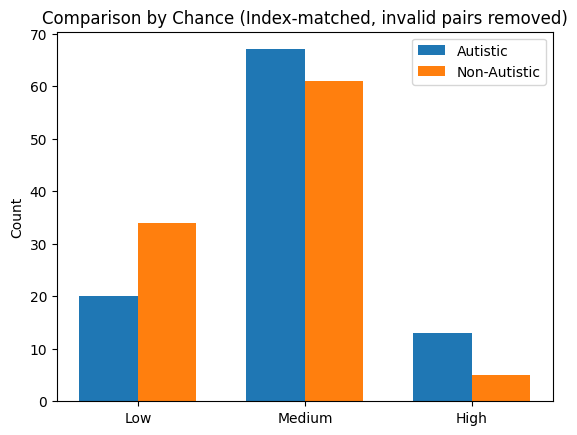

In [33]:
valid_values = {"low", "medium", "high"}

def get_chance(d):
    """Return normalized 'chance' string or None if missing/invalid."""
    v = d.get("chance", None)
    if not isinstance(v, str):
        return None
    v = v.strip().lower()
    return v if v in valid_values else None

# Index-matched filtering: keep only pairs where BOTH sides are valid
paired_valid = []
n_pairs = min(len(autistic_results_loaded), len(non_autistic_results_loaded))
for a_dict, b_dict in zip(autistic_results_loaded[:n_pairs], non_autistic_results_loaded[:n_pairs]):
    a = get_chance(a_dict)
    b = get_chance(b_dict)
    if a is not None and b is not None:
        paired_valid.append((a, b))

# Split back into two aligned lists
autistic_clean = [a for a, _ in paired_valid]
non_autistic_clean = [b for _, b in paired_valid]

print("Total pairs considered:", n_pairs)
print("Valid, aligned pairs kept:", len(paired_valid))
print("Dropped pairs:", n_pairs - len(paired_valid))

# Counts
categories = ["low", "medium", "high"]
autistic_counts = Counter(autistic_clean)
non_autistic_counts = Counter(non_autistic_clean)

autistic_values = [autistic_counts.get(cat, 0) for cat in categories]
non_autistic_values = [non_autistic_counts.get(cat, 0) for cat in categories]

# Plot (grouped bars)
x = range(len(categories))
bar_width = 0.35

plt.bar([i - bar_width/2 for i in x], autistic_values, width=bar_width, label="Autistic")
plt.bar([i + bar_width/2 for i in x], non_autistic_values, width=bar_width, label="Non-Autistic")

plt.xticks(x, [c.capitalize() for c in categories])
plt.ylabel("Count")
plt.title("Comparison by Chance (Index-matched, invalid pairs removed)")
plt.legend()
plt.show()